In [ ]:
!pip install shap -q

In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import shap

In [ ]:
df=pd.read_csv('Life Expectancy Data.csv')

In [ ]:
df


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
df.shape

(2938, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Variable Descriptions
Format: variable (type) - description

country (Nominal) - the country in which the indicators are from (i.e. United States of America or Congo)
year (Ordinal) - the calendar year the indicators are from (ranging from 2000 to 2015)
status (Nominal) - whether a country is considered to be 'Developing' or 'Developed' by WHO standards
life_expectancy (Ratio) - the life expectancy of people in years for a particular country and year
adult_mortality (Ratio) - the adult mortality rate per 1000 population (i.e. number of people dying between 15 and 60 years per 1000 population); if the rate is 263 then that means 263 people will die out of 1000 between the ages of 15 and 60; another way to think of this is that the chance an individual will die between 15 and 60 is 26.3%
infant_deaths (Ratio) - number of infant deaths per 1000 population; similar to above, but for infants
alcohol (Ratio) - a country's alcohol consumption rate measured as liters of pure alcohol consumption per capita
percentage_expenditure (Ratio) - expenditure on health as a percentage of Gross Domestic Product (gdp)
hepatitis_b (Ratio) - number of 1 year olds with Hepatitis B immunization over all 1 year olds in population
measles (Ratio) - number of reported Measles cases per 1000 population
bmi (Interval/Ordinal) - average Body Mass Index (BMI) of a country's total population
under-five_deaths (Ratio) - number of people under the age of five deaths per 1000 population
polio (Ratio) - number of 1 year olds with Polio immunization over the number of all 1 year olds in population
total_expenditure (Ratio) - government expenditure on health as a percentage of total government expenditure
diphtheria (Ratio) - Diphtheria tetanus toxoid and pertussis (DTP3) immunization rate of 1 year olds
hiv/aids (Ratio) - deaths per 1000 live births caused by HIV/AIDS for people under 5; number of people under 5 who die due to HIV/AIDS per 1000 births
gdp (Ratio) - Gross Domestic Product per capita
population (Ratio) - population of a country
thinness_1-19_years (Ratio) - rate of thinness among people aged 10-19 (Note: variable should be renamed to thinness_10-19_years to more accurately represent the variable)
thinness_5-9_years (Ratio) - rate of thinness among people aged 5-9
income_composition_of_resources (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
schooling (Ratio) - average number of years of schooling of a population
As stated above it would be useful to change the name of the variable thinness_1-19_years to thinness_10-19_years as it is a more accurate depiction of what the variable means.

In [ ]:
df.describe().iloc[:, 1:]

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Things that may not make sense from above:

Adult mortality of 1? This is likely an error in measurement, but what values make sense here? May need to change to null if under a certain threshold.
Infant deaths as low as 0 per 1000? That just isn't plausible - I'm deeming those values to actually be null. Also on the other end 1800 is likely an outlier, but it is possible in a country with very high birthrates and perhaps a not very high population total - this can be dealt with later.
BMI of 1 and 87.3? Pretty sure the whole population would not exist if that were the case. A BMI of 15 or lower is seriously underweight and a BMI of 40 or higher is morbidly obese, therefore a large number of these measurements just seem unrealistic...this variable might not be worth digging into at all.
Under Five Deaths, similar to infant deaths just isn't likely (perhaps even impossible) to have values at zero.
GDP per capita as low as 1.68 (USD) possible? Doubtful - but perhaps values this low are outliers.
Population of 34 for an entire country

In [ ]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Data Preprocessing

In [ ]:
df.columns = [col.strip() for col in df.columns]
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
1645,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
1646,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
1647,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
df.shape

(1649, 22)

In [ ]:
df['Status'].value_counts()

Developing    1407
Developed      242
Name: Status, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()
df['Status']=L.fit_transform(df['Status'])
df['Status'].head()

0    1
1    1
2    1
3    1
4    1
Name: Status, dtype: int64

([<matplotlib.patches.Wedge at 0x7b8ab6c55750>,
 [Text(-0.9851461924516737, 0.4893740690902718, 'Developing'),
  Text(0.985146146633162, -0.48937416132631345, 'Developed')],
 [Text(-0.5373524686100037, 0.2669313104128755, '85.32%'),
  Text(0.5373524436180883, -0.26693136072344364, '14.68%')])

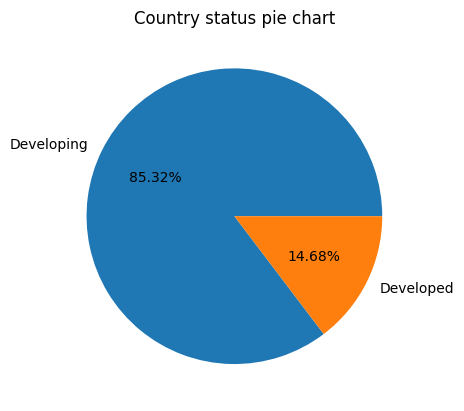

In [ ]:
Status1=df['Status'].value_counts().values
labels1 = ['Developing' ,'Developed']
plt.title('Country status pie chart')
plt.pie(Status1,labels=labels1,autopct='%1.2f%%')

In [ ]:
df1=df
df=pd.get_dummies(df,columns=["Status","Country"])
df.tail()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Zambia,Country_Zimbabwe
1644,2004,44.3,723.0,27,4.36,0.0,68.0,31,27.1,42,...,0,0,0,0,0,0,0,0,0,1
1645,2003,44.5,715.0,26,4.06,0.0,7.0,998,26.7,41,...,0,0,0,0,0,0,0,0,0,1
1646,2002,44.8,73.0,25,4.43,0.0,73.0,304,26.3,40,...,0,0,0,0,0,0,0,0,0,1
1647,2001,45.3,686.0,25,1.72,0.0,76.0,529,25.9,39,...,0,0,0,0,0,0,0,0,0,1
1648,2000,46.0,665.0,24,1.68,0.0,79.0,1483,25.5,39,...,0,0,0,0,0,0,0,0,0,1


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


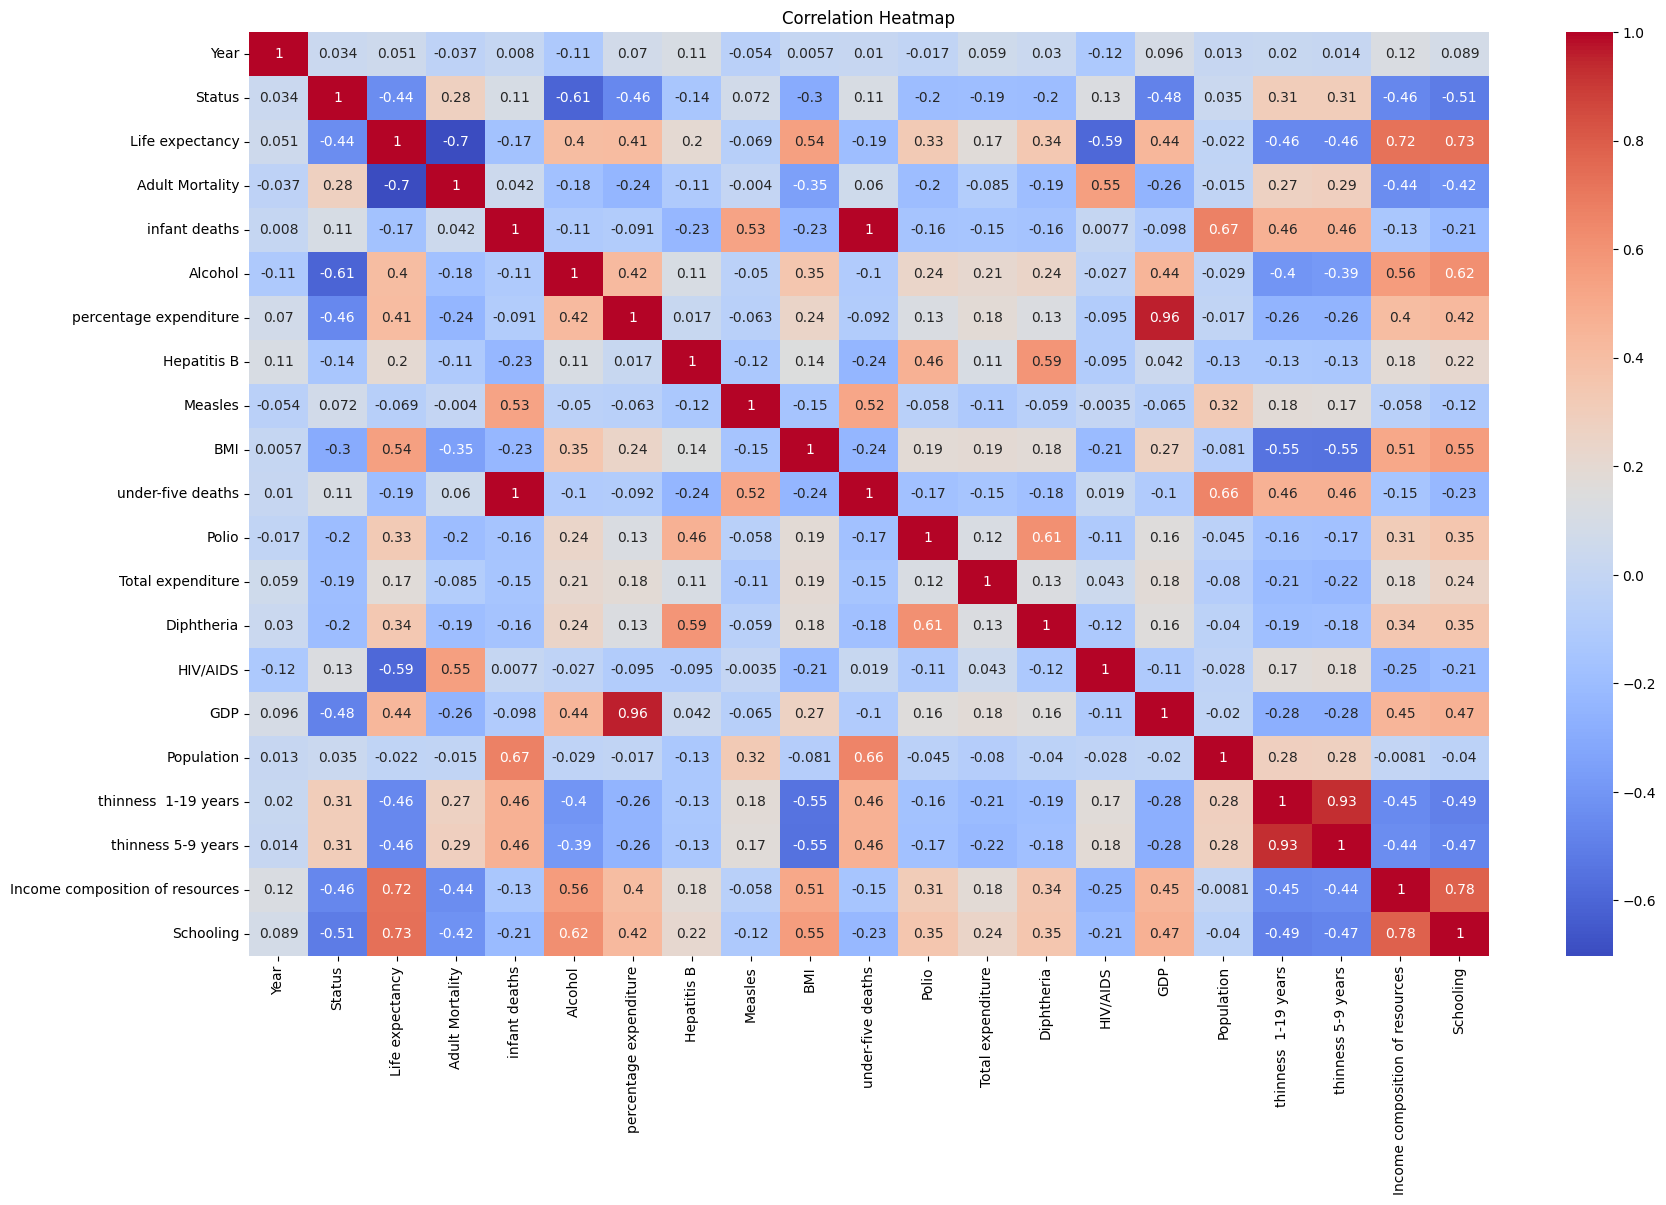

In [ ]:
# Visualize the correlation between variables using a heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Life Expectancy (target variable) appears to be relatively highly correlated (negatively or positively) with:
Adult Mortality (negative)
HIV/AIDS (negative)
Income Composition of Resources (positive)
Schooling (positive)
Life expectancy (target variable) is extremely lowly correlated to population (nearly no correlation at all)
Infant deaths and Under Five deaths are extremely highly correlated
Percentage Expenditure and GDP are relatively highly correlated
Hepatitis B vaccine rate is relatively positively correlated with Polio and Diphtheria vaccine rates
Polio vaccine rate and Diphtheria vaccine rate are very positively correlated


In [ ]:
from sklearn.model_selection import train_test_split
y=df["Life expectancy"]
x=df.drop(["Life expectancy"],axis='columns')
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lm = LinearRegression()

In [ ]:
lm.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(x_test)

In [ ]:

print("R2 value = ", round(metrics.r2_score(y_test,y_pred), 3))
print("MAE = ", round(metrics.mean_absolute_error(y_test,y_pred), 3))
print("MSE = ", round(metrics.mean_squared_error(y_test,y_pred), 3))
print("RMSE = ", round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)), 3))

R2 value =  0.945
MAE =  1.224
MSE =  4.309
RMSE =  2.076


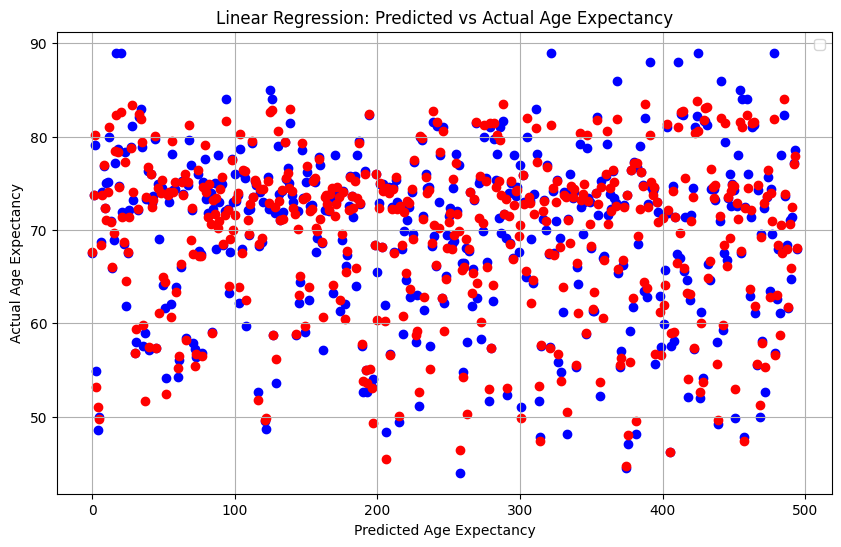

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(y_pred)), y_pred, color='red')

plt.xlabel("Predicted Age Expectancy")
plt.ylabel("Actual Age Expectancy")
plt.title("Linear Regression: Predicted vs Actual Age Expectancy")
plt.legend()
plt.grid(True)
plt.show()


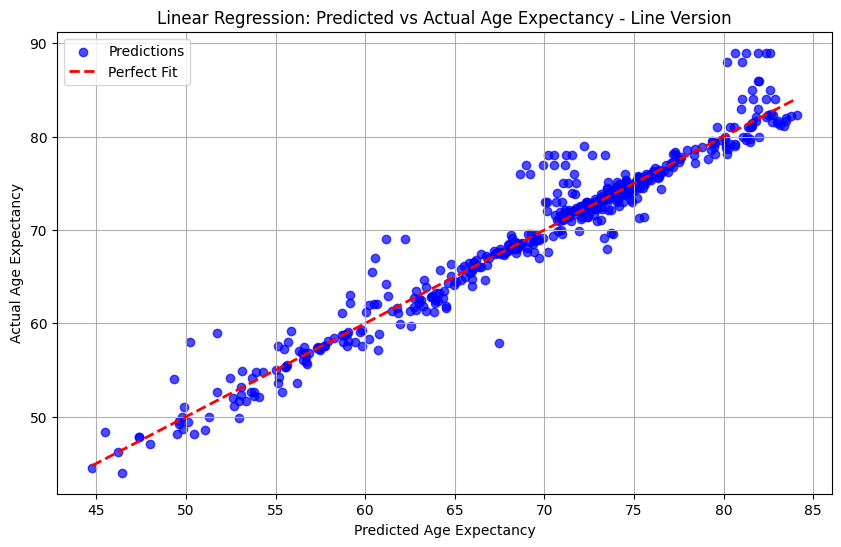

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test, color='blue', marker='o', alpha=0.7, label='Predictions')
plt.plot([min(y_pred), max(y_pred)],
         [min(y_pred), max(y_pred)], color='red', linestyle='--', linewidth=2, label='Perfect Fit')

plt.xlabel("Predicted Age Expectancy")
plt.ylabel("Actual Age Expectancy")
plt.title("Linear Regression: Predicted vs Actual Age Expectancy - Line Version")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import shap
shap.initjs()
explainer = shap.LinearExplainer(lm, x_test)
shap_values = explainer.shap_values(x_test)
val=10
shap.force_plot(explainer.expected_value, shap_values[val,:], x_test.iloc[val,:])

In [ ]:
def pipeline(datapoint):
  print("The estimated life expectancy is =",lm.predict(datapoint)[0])
  return lm.predict(datapoint)[0]

In [ ]:
Predicted_Age = pipeline(x_test[1:4])

The estimated life expectancy is = 73.78566115417993


An R^2 score of 0.945 indicates that 94.5% of the variation in the dependent variable (life expectancy) can be explained by the independent variables in the model. This suggests a strong positive relationship between the independent and dependent variables.

The high R^2 score also implies that the regression model can accurately predict life expectancy based on the values of the independent variables. This allows for reliable estimation of life expectancy for different populations or individuals with specific characteristics.